In [1]:
import numpy as np
from birkeland import Model
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

# Reproduce the plots from Milan (2013)
The below code instantiates the two examples from Milan (2013) and attempts to reproduce the plots from Milan (2013).

In [2]:
example1 = Model(50, 0, 0.4)
example2 = Model(30, 70, 0.7)

## Reproduce Figure 2a–d

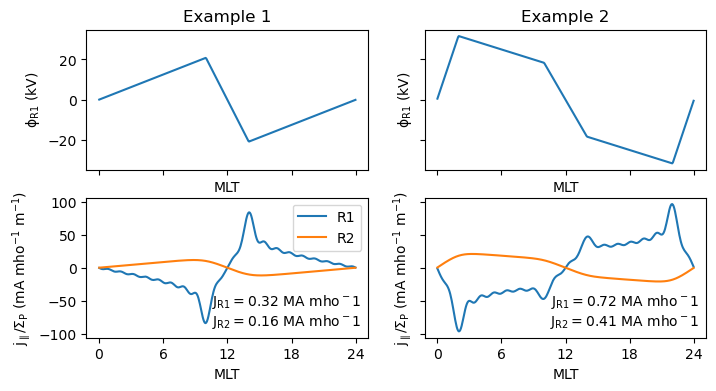

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(8, 4), sharex="all", sharey="row")

for cnt, example in enumerate((example1, example2)):
    example.plot_r1_potential(ax[0, cnt])
    example.plot_r1_and_r2_intensity(ax[1, cnt])
    
ax[1, 0].legend(loc="upper right")
ax[0, 0].set(title="Example 1")
ax[0, 1].set(title="Example 2")

plt.show()

## Reproduce the contours in Figure 2e-j

The contours are at intervals of 10 kV from 5 kV upward; the 6 kV interval stated in the caption to Figure 2 is a typographical error.

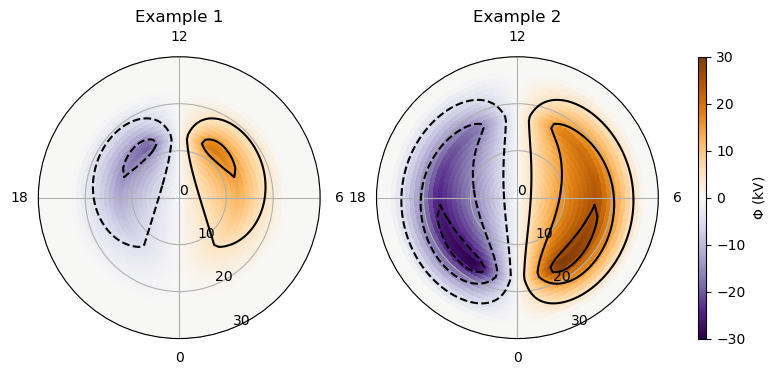

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw={"polar": True})
mesh = np.empty_like(ax, dtype=object)

for cnt, example in enumerate([example1, example2]):
    mesh[cnt] = example.map_electric_potential(ax[cnt])
    ax[cnt].set_title(f"Example {cnt + 1}")

cax = example.add_cax(fig, ax)
cbar = plt.colorbar(mesh[0], cax=cax)
cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label(r"$\mathregular{\Phi}$ (kV)")

plt.show()

## Reproduce the maps in Figures 2e-h

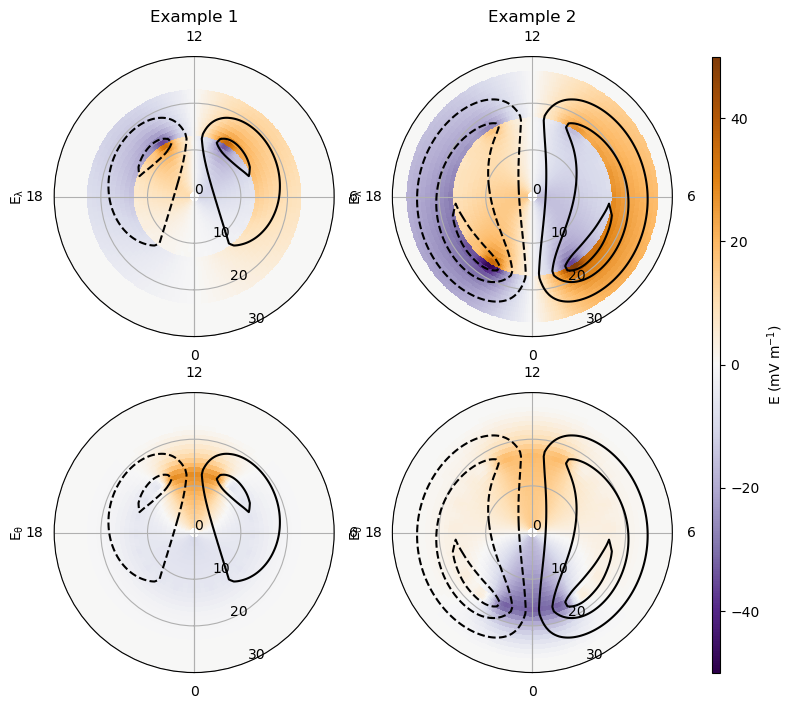

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), subplot_kw={"polar": True})
mesh = np.empty_like(ax, dtype=object)

for col, example in enumerate([example1, example2]):
    for row, component in enumerate(["labda", "theta"]):
        mesh[row, col] = example.map_electric_field(ax[row, col], component)
    ax[0, col].set_title(f"Example {col + 1}")
        
cax = example.add_cax(fig, ax)
cbar = plt.colorbar(mesh[0, 0], cax=cax)
cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label(r"E (mV m$^{-1}$)")

plt.show()

## Reproduce Figure 2i–j

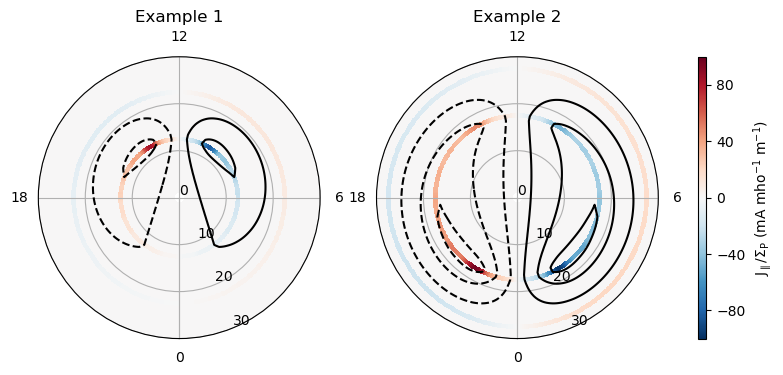

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw={"polar": True})
mesh = np.empty_like(ax, dtype=object)

for cnt, example in enumerate([example1, example2]):
    mesh[cnt] = example.map_current(ax[cnt])
    ax[cnt].set_title(f"Example {cnt + 1}")

cax = example.add_cax(fig, ax)
cbar = plt.colorbar(mesh[0], cax=cax)
cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label(r"$\mathregular{J_\parallel/\Sigma_P}$ (mA mho$^{-1}$ m$^{-1}$)")

## Plot the ionospheric flow vector

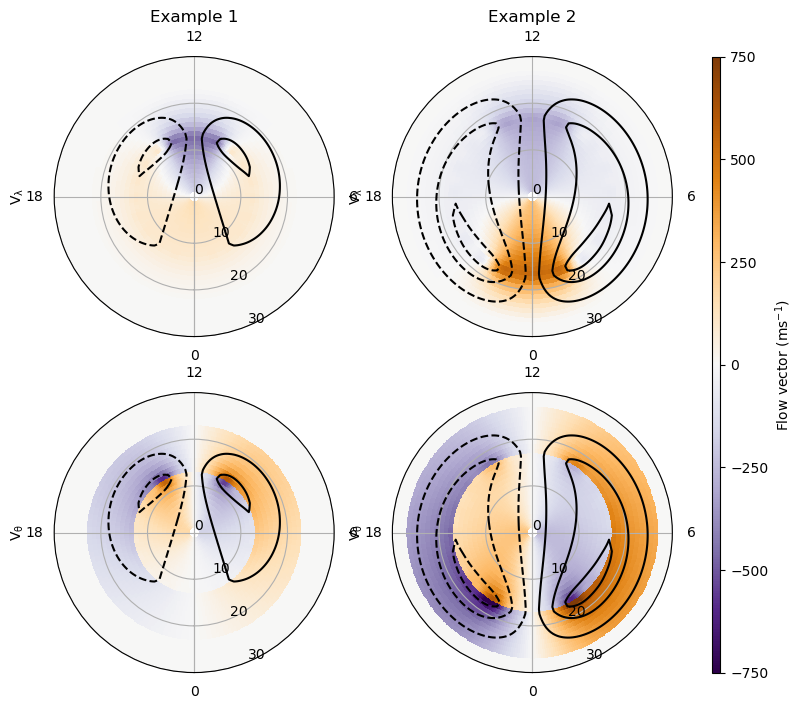

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), subplot_kw={"polar": True})
mesh = np.empty_like(ax, dtype=object)

for col, example in enumerate([example1, example2]):
    for row, component in enumerate(["labda", "theta"]):
        mesh[row, col] = example.map_flow_vector(ax[row, col], component)
    ax[0, col].set_title(f"Example {col + 1}")
    
cax = example.add_cax(fig, ax)
cbar = plt.colorbar(mesh[0, 0], cax=cax)
cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label(r"Flow vector (ms$^{-1}$)")